## Importing the Halo Pipeline
The first line of code is an import statement, it brings in the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

For this jupyter notebook, the pipeline is generated from the YAML file, halo.yml. The default setting can be checked in readme.md in the data/Skypy folder.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

In [2]:
halos= pipeline.halos
print(halos)

        z                 mass           first_moment   
------------------ ------------------ ------------------
 4.945286354475944 1186847286146.6785 1478547690653.2004
3.7261032263962477 1204889197595.3135 1606490105640.1162
 3.086547321092402 1104047657128.5962 1689731579904.8625
 4.037657639213795 2038047214948.5112 1570146748122.4846
 2.224534908340365 2885296200965.0044 1821397012449.2607
3.2675597362163664  3607407974316.393 1664951409734.8787
  4.37484158595443 2631713210291.4033 1533787045869.1516
 3.067350636933112 1755497646144.3132 1692415280745.3115
 4.611924147265714  3109206095437.731 1509901283063.7222
1.3551213239683026 2007070058292.6511  1973342828293.928
  4.87261679349964 1867363292860.9922 1485145607475.4663
2.1139119736253438 1434899296705.5276 1839859945372.3967
1.9215290591235565 1933980524243.9834 1872668109669.7021
0.5297586915985184  5103526953091.524 2117663680411.0571
 4.428139034454637  1135317155821.952 1528260683680.5005
2.0988437235303876 133966840523

## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos, sky_area=0.0001,cosmo=cosmo, samples_number= 10000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

area [0.0517117  0.06630306 0.07559197 0.062161   0.08824076 0.07287539
 0.05800045 0.07588276 0.05527504 0.0916924  0.05246247 0.08958687
 0.09153883 0.05129814 0.05737354 0.08975932 0.06210577 0.05565508
 0.09271039 0.09298662 0.09222095] Mpc2
epsilon_crit [7110417076336802.0, 4310763778375194.0, 3317821679972086.5, 4896003058641979.0, 2333166579547816.0, 3573360810819001.0, 5620259126772671.0, 3291804424968450.0, 6194962188731674.0, 1689462140967921.0, 6899145757056285.0, 2231983211341159.5, 2068969859105325.2, 1622209975294610.0, 5744426515722602.0, 2218621679641760.5, 4904621373088312.0, 6109092942320026.0, 1933356210270693.0, 1806407096295637.2, 1717552449917176.0]
first_moment/area [2.85921308e+13 2.42295018e+13 2.23533216e+13 2.52593554e+13
 2.06412209e+13 2.28465528e+13 2.64443982e+13 2.23030267e+13
 2.73161504e+13 2.15213349e+13 2.83087225e+13 2.05371610e+13
 2.04576354e+13 4.12814890e+13 2.66370282e+13 2.05261374e+13
 2.52741101e+13 2.71890948e+13 2.05336490e+13 2.08305599e+

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [4]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

For this Halos list, elapsed time for computing weak-lensing maps: 54.958600997924805 seconds
[[-0.0190339   0.05266779]
 [-0.03026685  0.04621688]
 [-0.05609231  0.05799677]
 ...
 [-0.06761224  0.0314269 ]
 [-0.04505792  0.01787897]
 [ 0.17030189  0.08882323]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

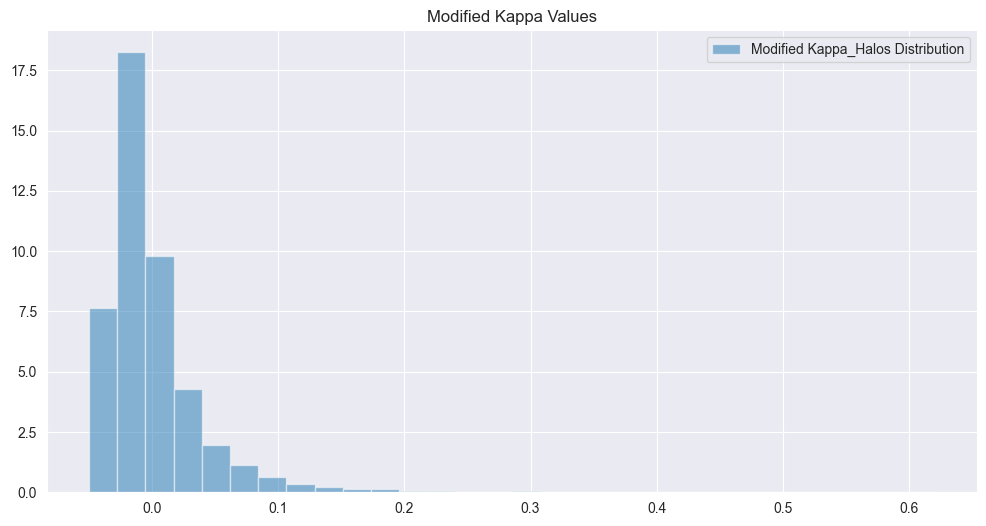

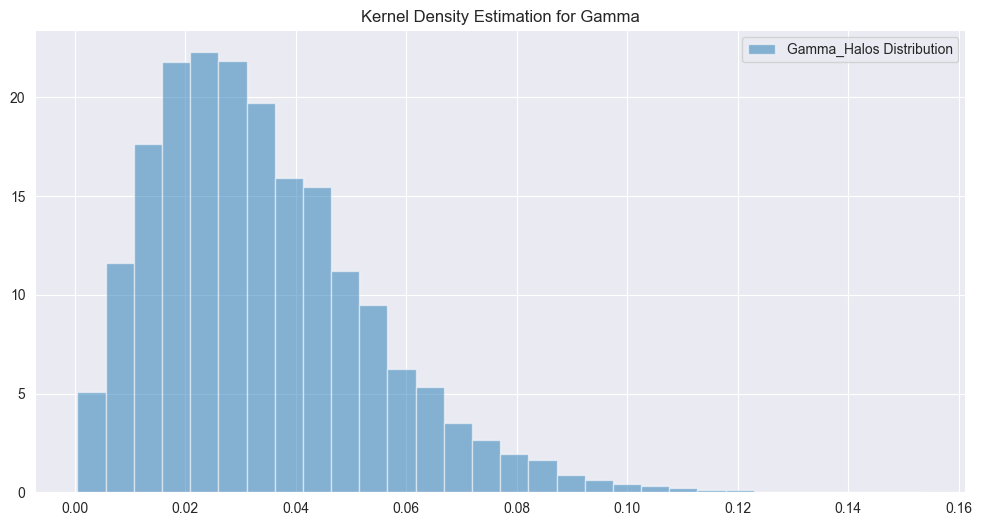

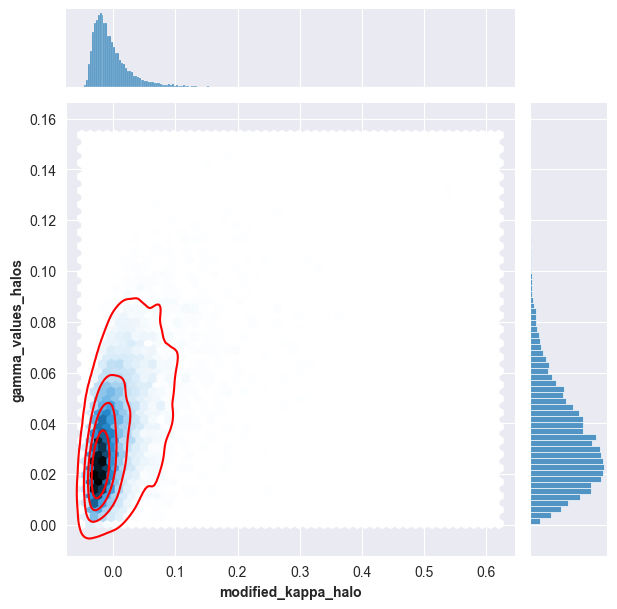

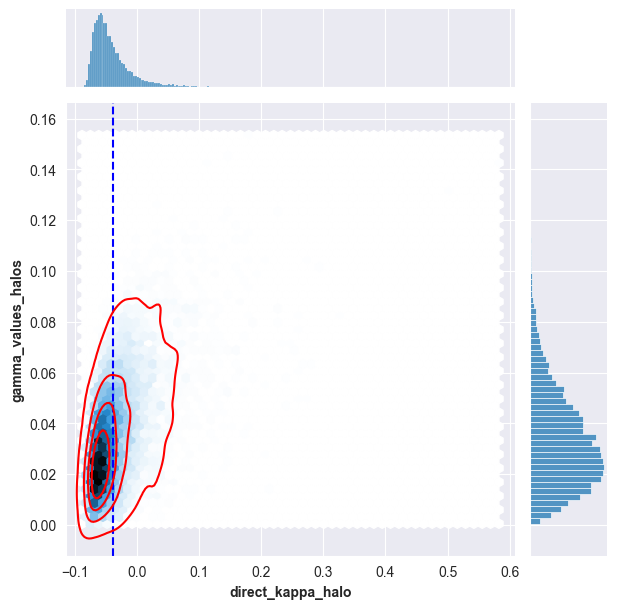

Spearman correlation coefficient:  0.4788138918015754
Kendall Tau correlation coefficient:  0.33170091340834995


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title(f'Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

import seaborn as sns
modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color='blue', linestyle='--')
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

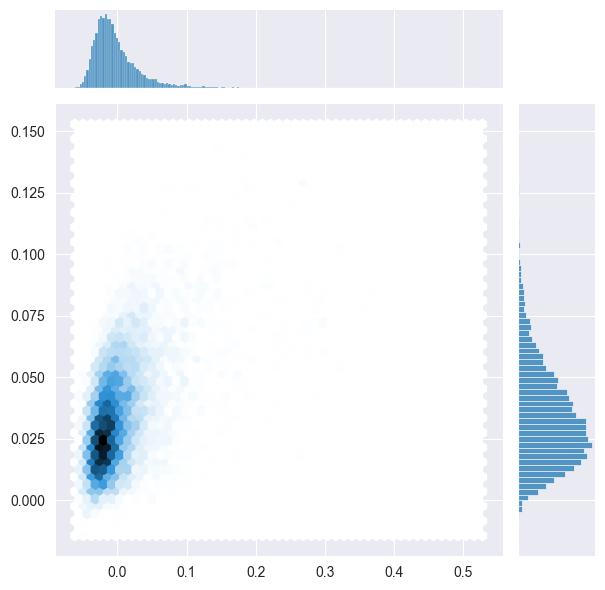

In [6]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [7]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings

nk,ng = run_halos_without_kde(n_iterations=20, sky_area=0.0001, samples_number=10,cosmo=FlatLambdaCDM(H0=70, Om0=0.3),                                         m_min=None, m_max=None, z_max=None)


KeyboardInterrupt: 

Visualization of ` run_halos_without_kde()`

In [ ]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('unmodified_kappa_100lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_500lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])